In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib.ticker import AutoMinorLocator
import os

cmd_folder = os.path.realpath(os.getenv("SESNCFAlib"))

if cmd_folder not in sys.path:
     sys.path.insert(0, cmd_folder)
        
cmd_folder = '/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl_output/'

if cmd_folder not in sys.path:
     sys.path.insert(0, cmd_folder)
        
import templutils as templutils
import snclasses as snstuff

%matplotlib inline

In [20]:
sn_names = ['sn1994I', 'sn2020oi', 'sn2018gep']
bands = ['R', 'r', 'r']

SN name short: 94I



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn94I.f']


#######NIR#######

No CfA NIR files
0
reading small file
Vmax 2449451.9
SN name short: 20oi



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn20oi.f']


#######NIR#######

No CfA NIR files
reading small file
sn2020oi is not in the  list.
Vmax nan
SN name short: 18gep



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn18gep.f']


#######NIR#######

No CfA NIR files
reading small file
sn2018gep is not in the  list.
Vmax nan


/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/SESNCFAlib/snclasses.py:5324: UserWarning: loadtxt: input contained no data: "/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/94I.dat"
  self.nirlc = np.loadtxt(f, usecols=(0, 1, 2, 3), \


Text(0, 0.5, 'Relative Magnitude')

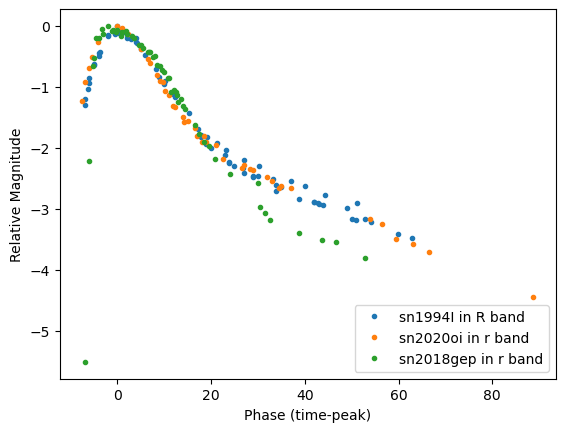

In [21]:
for s, sn in enumerate(sn_names):
    b = bands[s]
    thissn = snstuff.mysn(sn, addlit=True)
    lc, flux, dflux, snname = thissn.loadsn2(verbose=False)
    thissn.setphot()
    thissn.getphot(verbose=False)
    thissn.setphase(verbose=False)
    thissn.sortlc()
    input_file, snn = thissn.readinfofileall(verbose=False)
    
    xmin = thissn.photometry[b]['mjd'].min()
    x = thissn.photometry[b]['mjd']    
    y = thissn.photometry[b]['mag']

    yerr = thissn.photometry[b]['dmag']
    x = x - x[np.argmin(y)]

    idx = np.lexsort([x, y])
    out = np.sort(idx[np.unique(x[idx], return_index=1)[1]])
    x = x[out]
    y = y[out]

    y = np.min(y)-y
    
    if sn == 'sn2018gep':
        x = x-2
    
    plt.plot(x, y, '.', label=sn + ' in %s band'%b)
plt.legend(loc = 4)

plt.xlabel('Phase (time-peak)')
plt.ylabel('Relative Magnitude')